In [13]:
### imports ###
import pygmt
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap
import pandas as pd

import pandas as pd

%matplotlib inline
%matplotlib widget

In [3]:
# Major tectonic blocks and faults are marked by black lines (after Styron et al. (2010) and Taylor and An Yin (2009))
# https://github.com/HimaTibetMap/HimaTibetMap/tree/master
# Styron, R., Taylor, M., and Okoronkwo, K., 2010, HimaTibetMap-1.0: new ‘web-2.0’ online database of active structures from the Indo-Asian collision, Eos, vol.91 no. 20.
# Taylor, Michael, and An Yin, 2009, "Active structures of the Himalayan-Tibetan orogen and their relationships to earthquake distribution, contemporary strain field, and Cenozoic volcanism." Geosphere vol. 5, no. 3, pp 199-214.

# Slab contours are from the slab model of Hayes et al. (2018).
# Hayes, G., 2018, Slab2 - A Comprehensive Subduction Zone Geometry Model: U.S. Geological Survey data release, https://doi.org/10.5066/F7PV6JNV. 

# Seismicity from the Harvard CMT cffatalogue (Dziewonski et al. (1981), Ekstr ̈om et al. (2012), https://www.globalcmt.org/.
# InSAR DURATION ONLY 20160309 20240710


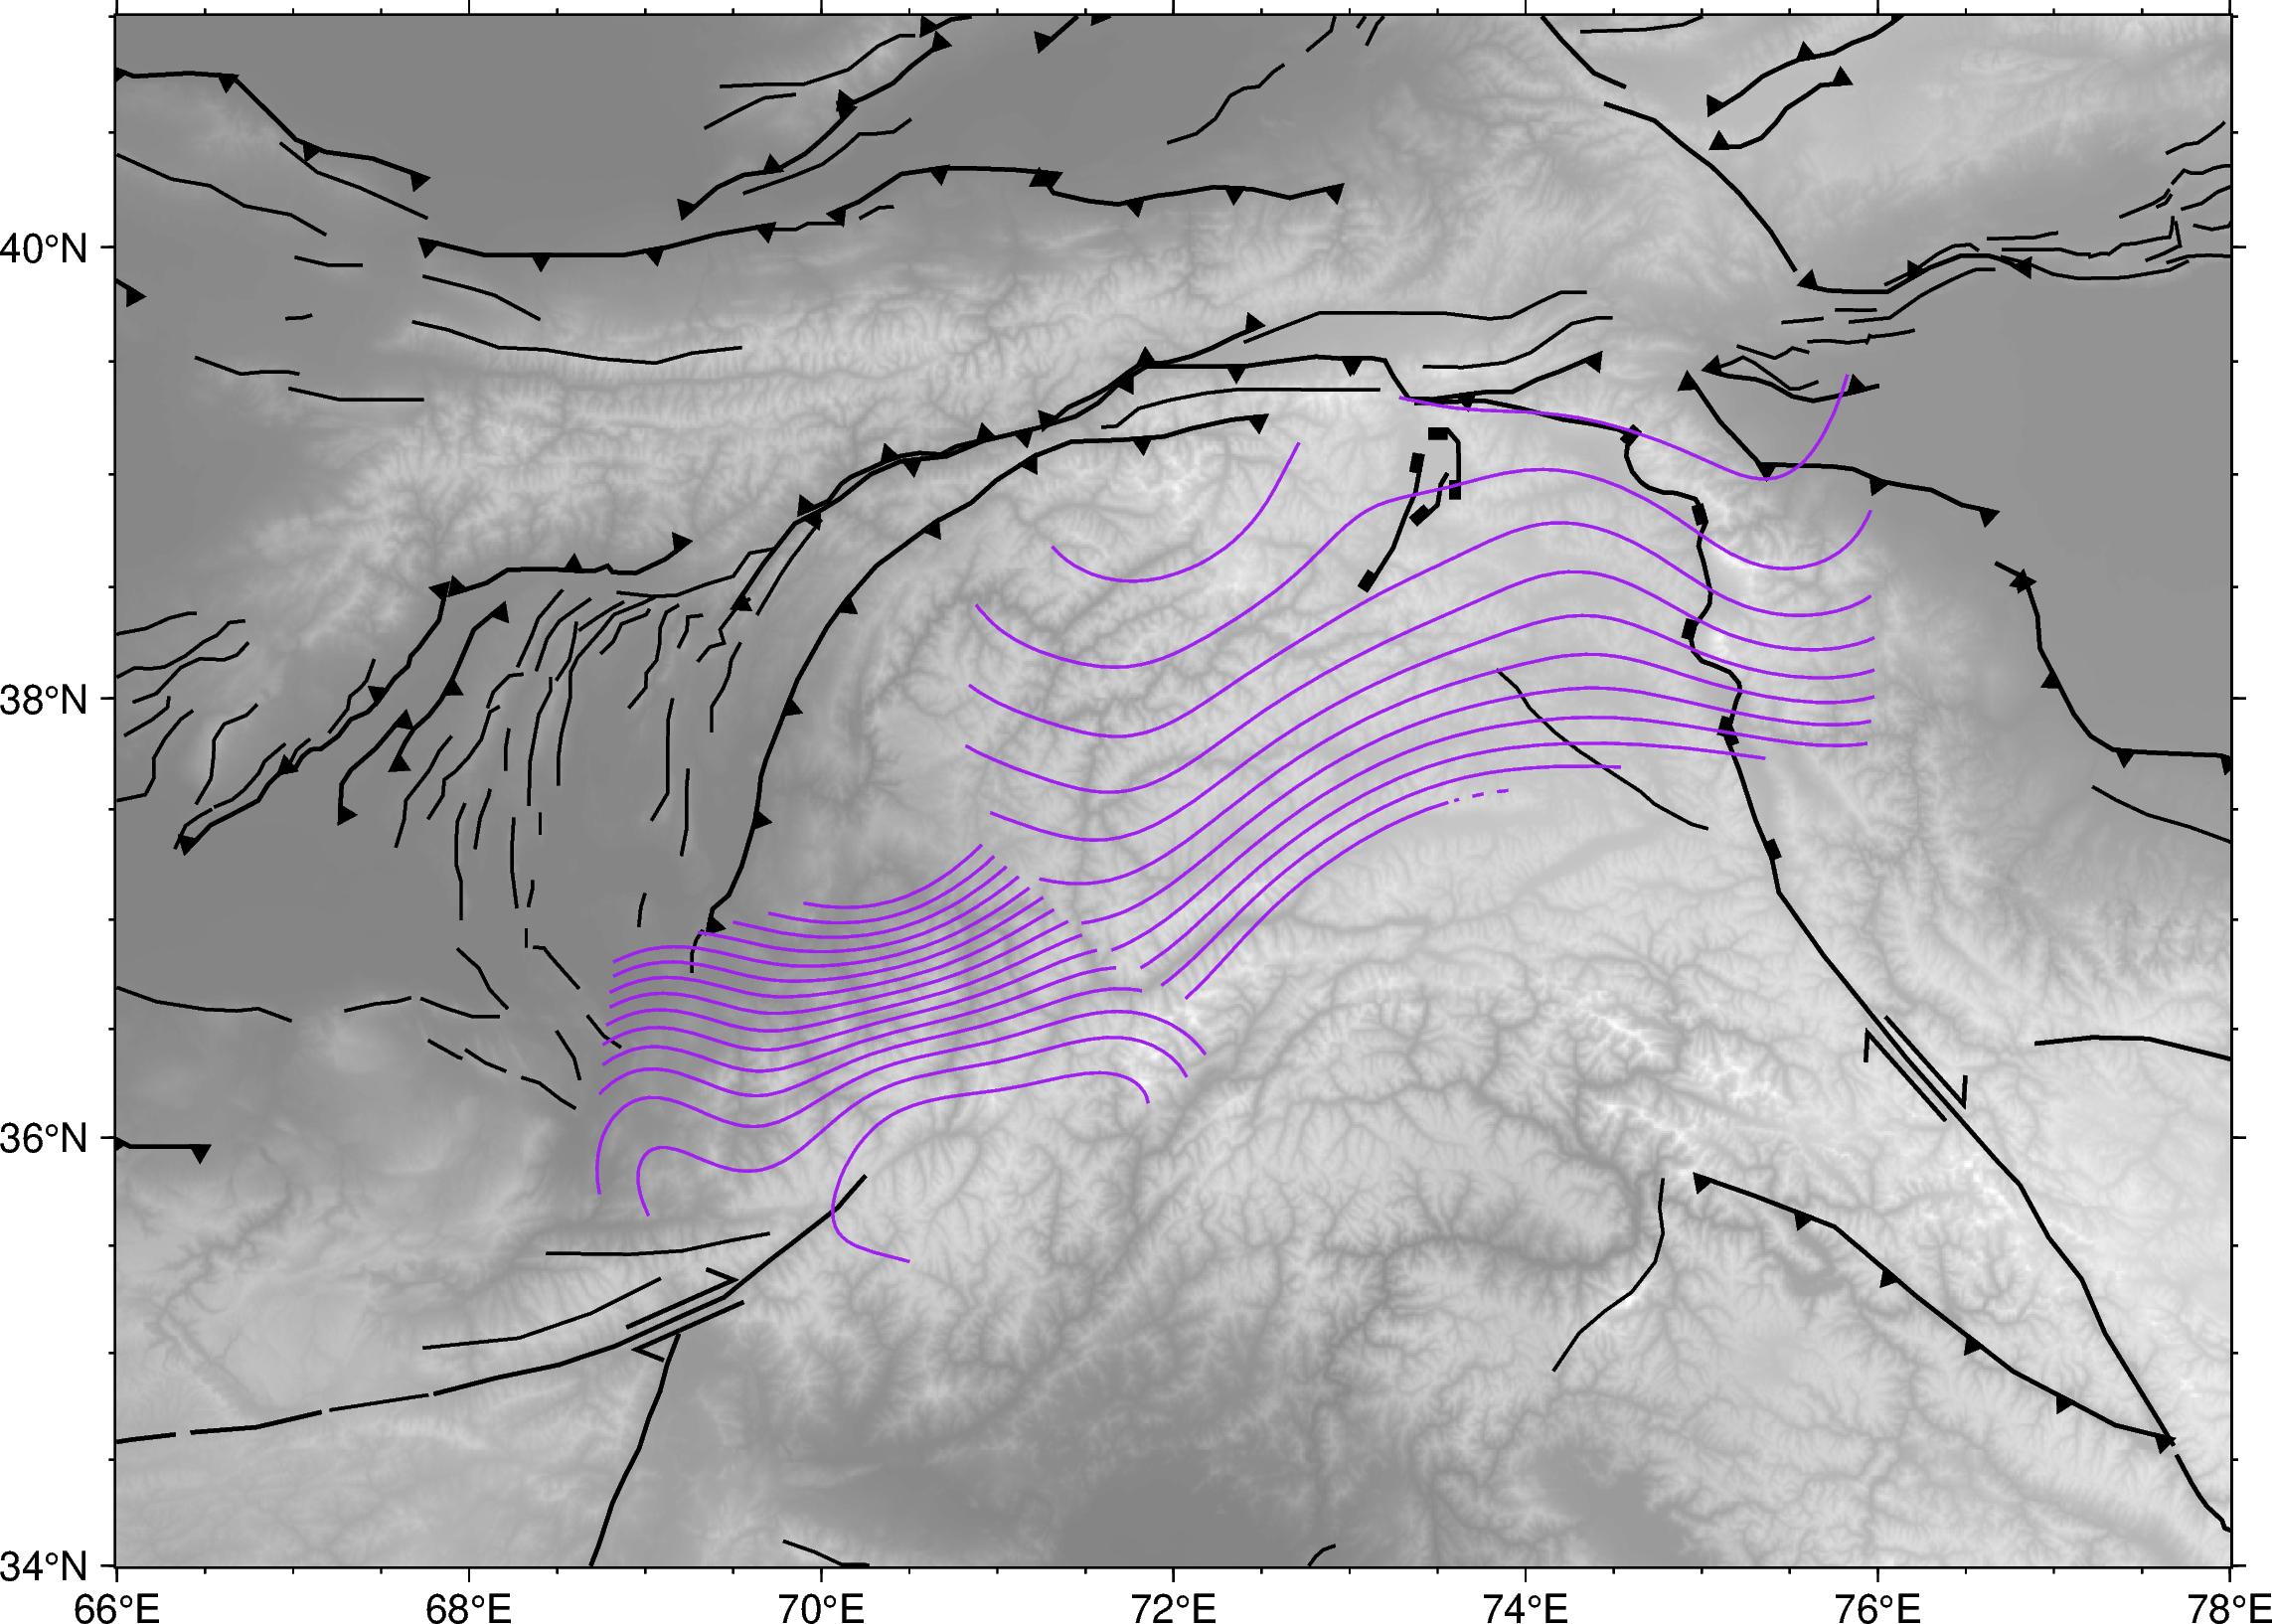

In [19]:
### GMT basemap ###
import os
dir = "/Users/rochelle/Documents/GitHub/Leeds-Research-Internship/"
os.chdir(dir)

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=66 # lower left corner longitude 
llcrnrlat=34 # lower left corner latitude
urcrnrlon=78 # upper right corner longitude
urcrnrlat=41 # upper right corner latitude


proj_scale_w = 18 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i
###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]

grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)


fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain") # figure config (borders)
fig.coast(region=region,\
          projection="M%s/%s/%s%s" % (centerlon, urcrnrlat, proj_scale_w, proj_scale_unit),\
          water="white", land="grey", shorelines="1/0.5p",\
          frame=["WSne", "a2f0.5"])

          # Mercator
          # a2f0.5 --> major ticks every 2 and minor ticks every 0.5

fig.grdimage(grid=grid, cmap="bin/cpt/custom/seabluelandgrey.cpt")
# fig.grdimage(grid=grid, cmap="geo")


## plotting faults
# https://www.pygmt.org/dev/gallery/lines/linefronts.html
fig.plot(data="bin/faults/HimaTibetMap.gmt", pen=f"0.7p,black") # all faults
fig.plot(data="bin/faults/normal.gmt", style="f1c/0.13c+l+b", pen=f"0.95p,black", fill="black") # normal
fig.plot(data="bin/faults/thrust.gmt", style="f1c/0.13c+l+t", pen=f"0.95p,black", fill="black") # thrust
fig.plot(data="bin/faults/dextral.gmt", style="f5c/1c+r+s45+o2.25c", pen=f"0.95p,black", fill="black") # dextral (right)
fig.plot(data="bin/faults/sinistral.gmt", style="f5c/1c+l+s45+o2.25c", pen=f"0.95p,black", fill="black") # sinistral (left)


## plotting shallow (<45km) earthquakes from Kufner et al. (2018)
pygmt.makecpt(output="lightblue_shallow",
              series=[0, 45],
              cmap="bin/cpt/custom/lightblue.cpt")
            
              # redefine scale + inverse
              # stored in local sesh


fig.plot(data="bin/Kufneretal2018_intermediatedepth_catalog.txt", incols=[1,2,3],
         style="c5c", pen="thinnest,gray15,solid", cmap="lightblue_shallow", transparency=2)

## plot slab2.0 here
fig.plot(data="bin/hin_slab2_dep_02.24.18_contours.in", pen=f"0.65p,purple") # Hindu Kush, bounding coords 66 74 40 34
fig.plot(data="bin/pam_slab2_dep_02.26.18_contours.in", pen=f"0.65p,purple") # Pamir, bounding coords 68 78 41 35



fig.show()
fig.savefig("figures/Hindu_Kush_study_area_Kufner_networks.png")

In [1]:
# quick code to drop names

file_path = "bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_normal.xy"
headers = ["lon", "lat", "depth", "mrr", "mtt", "mpp", "mrt", "mrp", "mtp", "iexp", "X", "Y", "name"]
df = pd.read_csv(file_path, delim_whitespace=True, names=headers, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df.drop(df.columns[[10, 11, 12]], axis=1, inplace=True)
df.to_csv('bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_normal_dropname.xy', sep='\t', index=False)


NameError: name 'pd' is not defined

In [10]:
# quick code to seperate earthquake "type"

file_path = "bin/Kufneretal2017_intermediatedepth_catalog.txt"
headers = ["lon", "lat", "depth", "m_l", "err_abs", "err_avgrel", "area"]
df = pd.read_csv(file_path, delim_whitespace=True, names=headers, usecols=[0, 1, 2, 3, 4, 5, 6])
df = df[df["area"]!="deepHinduKush"]
df.to_csv('bin/Kufneretal2017_Pamir.txt', sep='\t', index=False)

/var/folders/xp/d0lbwvf108l78qt1c6tlwylh0000gn/T/ipykernel_3182/1750828088.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, names=headers, usecols=[0, 1, 2, 3, 4, 5, 6])


In [39]:
def num_lines(txt_file):
    lines = sum(1 for _ in open(txt_file))

    return lines

assert num_lines("bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_normal.xy") == num_lines("bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_normal_dropname.xy")

071A_05440_131313.geo.E.tif   20171030_20171123
071A_05440_131313.geo.N.tif   20171030_20171205
071A_05440_131313.geo.U.tif   20171030_20171217
071A_05440_131313.geo.hgt.tif 20171111_20171123
071A_05440_131313.geo.mli.tif 20171111_20171205
20160309_20160402             20171111_20171217
20160309_20160426             20171111_20171229
20160309_20160520             20171123_20171205
20160309_20160613             20171123_20171217
20160309_20160917             20171123_20171229
20160309_20170304             20171123_20180110
20160309_20170316             20171205_20171217
20160309_20170328             20171205_20171229
20160402_20160426             20171205_20180110
20160402_20160520             20171205_20180122
20160402_20160613             20171217_20171229
20160402_20160707             20171217_20180110
20160426_20160520             20171217_20180122
20160426_20160613             20171217_20180203
20160426_20160707             20171229_20180110
20160426_20160731             20171229_2

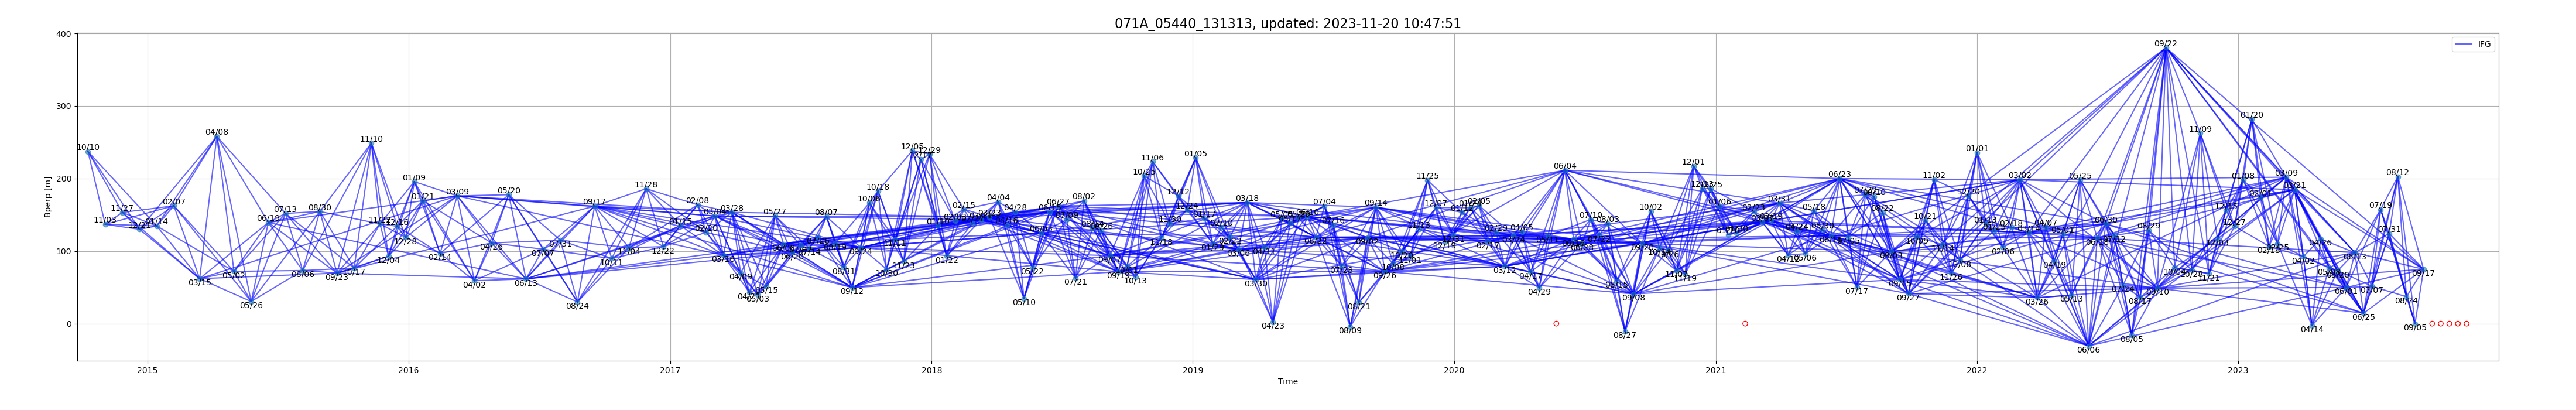

In [45]:
from IPython.display import Image #as display
import os

def display(png):
    if not os.path.exists(png):
        print('This png file does not exist, recheck please')
    else:
        return Image(png)
    
frame = '071A_05440_131313'
framedir = os.path.join(os.environ['HOME'],frame)
os.chdir(framedir)
os.chdir(framedir + "/GEOC")
! ls


png = "network.png"
display(png)